## OpenCV模版匹配

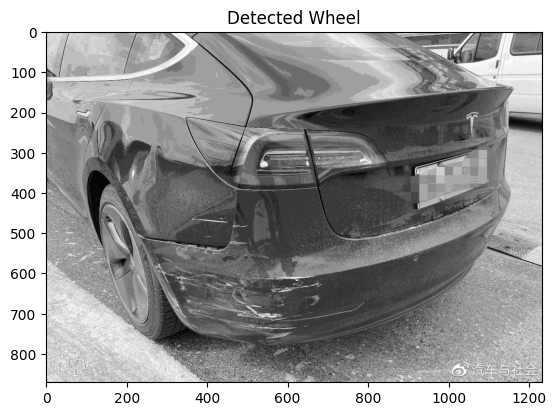

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取图像和模板
img = cv2.imread('2.jpg', 0)  # 确保图像是灰度
template = cv2.imread('tesla-wheel-111.png', 0)  # 同样是灰度
w, h = template.shape[::-1]

# 应用模板匹配
res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.3
loc = np.where(res >= threshold)

# 标记匹配区域
for pt in zip(*loc[::-1]):  # Switch collumns and rows
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)

# 显示结果
plt.imshow(img, cmap='gray')
plt.title('Detected Wheel')
plt.show()

## SIFT关键点匹配

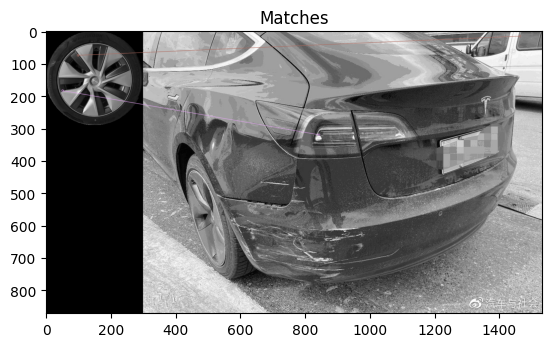

In [2]:
import cv2
import numpy as np

# 读取图像
img = cv2.imread('2.jpg', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('tesla-wheel-111.png', cv2.IMREAD_GRAYSCALE)

# 初始化SIFT检测器
sift = cv2.SIFT_create()

# 找到关键点和描述符
kp1, des1 = sift.detectAndCompute(template, None)
kp2, des2 = sift.detectAndCompute(img, None)

# 创建匹配器
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# 应用比率测试
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

# 绘制匹配结果
img_matches = cv2.drawMatchesKnn(template, kp1, img, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# 显示结果
# cv2.imshow("Matches", img_matches)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(img_matches, cmap='gray')
plt.title('Matches')
plt.show()

In [13]:

#print(img.shape)
#print(template.shape)
res

array([[ 0.11280348,  0.11163777,  0.11122634, ..., -0.01450932,
        -0.0151201 , -0.01599971],
       [ 0.11317398,  0.11224335,  0.11174065, ..., -0.01854285,
        -0.0190404 , -0.01979141],
       [ 0.11378203,  0.11327048,  0.11223665, ..., -0.02195036,
        -0.02250482, -0.02304483],
       ...,
       [ 0.15319678,  0.15256572,  0.15205078, ...,  0.0577976 ,
         0.05635752,  0.05596749],
       [ 0.15403154,  0.1533877 ,  0.15284845, ...,  0.05750122,
         0.05662229,  0.05567262],
       [ 0.15562113,  0.15472278,  0.15405446, ...,  0.05627148,
         0.05687495,  0.05656979]], dtype=float32)